# Set-5

In [20]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 1200
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

## Let us now take set-4 and reduce both $b_0$ and $l_B$, in order to make the effective theory more reliable: do we get better agreement now with the direct integration? (QL still takes place)

In [21]:
ParametersSet5 = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0= 0., FermiEnergy = 0., \
                     betaz=3., b0=0.1, pzNode2 = -1.6954156, EnergyNode2 = 0.033074835, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

In [9]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(5000)
params = copy(ParametersSet5)

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.1
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = params.pzNode2 + 0.2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.03323867 - 0.03332323)/(0.2-0.1))


del fsys_finerResolution, params, evals, evecs

[ 0.03118236  0.03243814  0.0336939   0.03494967] while the expected Weyl-node energy is 0.033074835
[-0.03317782 -0.03314306  0.03332323  0.03332323]
[-0.10302637 -0.10300973  0.03323867  0.03323867]
-0.0008456000000000435


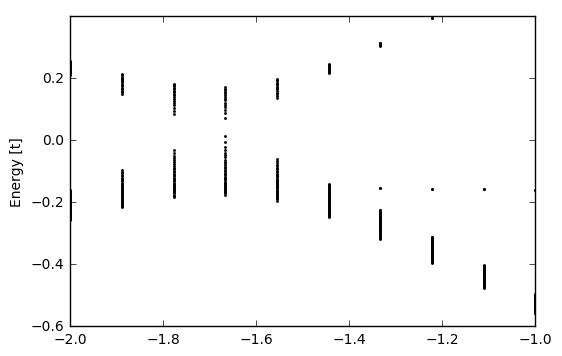

In [22]:
params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

evals, evecs = pSweep_1D( fsys_1D, params, -2., -1., pCount=10, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals, -2., -1., pCount = 10)

In [24]:
params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

pzStart = -1.64
pzEnd = 1.74
    
GridNumber = 10
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.5)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

{-1.64,-0.45130213978},WARNING: Two energies have too small splitting: 1.38777878078e-16 Try increasing the number of lattice sites
{-1.2644444444444445,-0.0124300049761},{-0.8888888888888888,-0.0213565121757},WARNING: Two energies have too small splitting: 3.33066907388e-16 Try increasing the number of lattice sites
{-0.5133333333333332,-0.0287725377267},WARNING: Two energies have too small splitting: 2.77555756156e-16 Try increasing the number of lattice sites
{-0.13777777777777778,-0.0328040679271},WARNING: Two energies have too small splitting: 1.38777878078e-16 Try increasing the number of lattice sites
{0.23777777777777764,-0.0327091455859},WARNING: Two energies have too small splitting: 6.38378239159e-16 Try increasing the number of lattice sites
{0.6133333333333335,-0.0274109032462},WARNING: Two energies have too small splitting: 7.21644966006e-16 Try increasing the number of lattice sites
{0.9888888888888892,-0.017690222741},WARNING: Two energies have too small splitting: 1.22

In [25]:
params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

pzStart = -1.64
pzEnd = 1.74
    
GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.5)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

{-1.64,-0.45130213978},{-1.5533333333333332,-0.0252342912711},{-1.4666666666666666,-0.0125451535411},WARNING: Two energies have too small splitting: 1.94289029309e-16 Try increasing the number of lattice sites
{-1.38,-0.0109766957181},WARNING: Two energies have too small splitting: 2.77555756156e-17 Try increasing the number of lattice sites
{-1.2933333333333332,-0.0119017890744},

ValueError: f(a) and f(b) must have different signs